# $k$ nearest neighbors approach

We try KNN classifier for several parameters $k$ using two different metrics: 'euclidean' and 'jaccard' for two different dataframes: "key_words_data" (39774 x 558) and "removed_adj_data" (39774 x 5642).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Matt Osborne's function for computing accuracy
def accuracy(true, predicted): 
    return np.sum(true==predicted)/len(predicted)

In [13]:
# a wrapper to try different values of k on different databases and metrics
def knn_tester(data_train, data_test, k_range, metric):
    ''' Input:
            data_train = a dataframe for training
            data_test = a dataframe for testing
            k_range = a range of k-values to try
            metric = a string with value of metric, e.g. 'jaccard' or 'euclidean'
        Assumptions:
            'cuisine' column has index 1
            food ingredients columns have indices [2:]
        Output:
            an array of floats, representing accuracies for the range k_range
        Side effect:
            plots the graph of accuracies against the range k_range
    '''
    klist, acclist = [],[]
    for k in k_range:
        print("trying",k,"neighbor classifier:",end=" ")
        knn = KNeighborsClassifier(n_neighbors = k, metric = metric)
        
        X = data_train.iloc[:,2:].values # values for training
        y = data_train.iloc[:,1].values # cuisine column
        z = data_test.iloc[:,2:].values # values for testing
        
        knn.fit(X,y)
        predictions = knn.predict(z)
        score = accuracy(data_test.cuisine.values,predictions)
        print("test set accuracy =", score)
        klist.append(k)
        acclist.append(score)
        
    fig, ax = plt.subplots()
    ax.set_xlabel('number of neighbors k')
    ax.set_ylabel('accuracy')
    ax.plot(klist,acclist,"ro")
    return np.array(acclist[:])

### analyzing key_words_data dataframe:

Now we are going to analyze a shortened dataframe "key_words_data".

In [6]:
kwd = pd.read_csv('key_words_data.csv')

In [7]:
kwd.shape

(39774, 558)

In [8]:
kwd.head()

,id,cuisine,adobo sauce,alfredo,barbecue sauce,chutney,enchilada sauce,kecap manis,ketchup,hot sauce,...,risotto,focaccia,prosecco,chianti,carnita,wafer,ravva,ouzo,lumpia,granola
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# preparing training and testing samples
kwd_train, kwd_test = train_test_split(kwd, 
                                       random_state=429,
                                       shuffle = True,
                                       test_size = 0.2,
                                       stratify = kwd.cuisine)

#### testing with euclidean metric:

trying 1 neighbor classifier: test set accuracy = 0.586046511627907
trying 2 neighbor classifier: test set accuracy = 0.556002514142049
trying 3 neighbor classifier: test set accuracy = 0.5909490886235073
trying 4 neighbor classifier: test set accuracy = 0.6085480829666876
trying 5 neighbor classifier: test set accuracy = 0.6155876807039597
trying 6 neighbor classifier: test set accuracy = 0.623507228158391
trying 7 neighbor classifier: test set accuracy = 0.6271527341294784
trying 8 neighbor classifier: test set accuracy = 0.6309239472030169
trying 9 neighbor classifier: test set accuracy = 0.632683846637335
trying 10 neighbor classifier: test set accuracy = 0.6306725329981144
trying 11 neighbor classifier: test set accuracy = 0.6328095537397863
trying 12 neighbor classifier: test set accuracy = 0.6350722815839095
trying 13 neighbor classifier: test set accuracy = 0.6364550597108737
trying 14 neighbor classifier: test set accuracy = 0.6349465744814582
trying 15 neighbor classifier: te

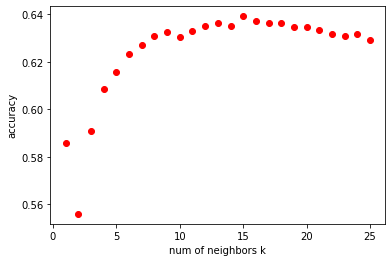

In [14]:
# COMPUTATION TIME: 7 min for 25 iterations (15 sec/iteration)
kwd_acc_euclidean = knn_tester(kwd_train, kwd_test, range(1,26), 'euclidean')

In [16]:
print("maximum accuracy =", kwd_acc_euclidean.max(), "at k =", kwd_acc_euclidean.argmax()+1)

maximum accuracy = 0.6392206159648021 at k = 15


#### testing with jaccard metric:

In [20]:
# converting data to bool for jaccard metric
kwd[kwd.columns[2:]] = kwd[kwd.columns[2:]].replace([0,1],[False,True])

In [21]:
kwd.head()

,id,cuisine,adobo sauce,alfredo,barbecue sauce,chutney,enchilada sauce,kecap manis,ketchup,hot sauce,...,risotto,focaccia,prosecco,chianti,carnita,wafer,ravva,ouzo,lumpia,granola
0,10259,greek,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,25693,southern_us,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20130,filipino,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,22213,indian,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13162,indian,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# same samples as before
kwd_train, kwd_test = train_test_split(kwd, 
                                       random_state=429,
                                       shuffle = True,
                                       test_size = 0.2,
                                       stratify = kwd.cuisine)

trying 1 neighbor classifier: test set accuracy = 0.6384663733500943
trying 2 neighbor classifier: test set accuracy = 0.612193588937775
trying 3 neighbor classifier: test set accuracy = 0.6490257699560025
trying 4 neighbor classifier: test set accuracy = 0.6667504714016342
trying 5 neighbor classifier: test set accuracy = 0.6742928975487115
trying 6 neighbor classifier: test set accuracy = 0.678441231929604
trying 7 neighbor classifier: test set accuracy = 0.683218101822753
trying 8 neighbor classifier: test set accuracy = 0.6853551225644249
trying 9 neighbor classifier: test set accuracy = 0.6856065367693275
trying 10 neighbor classifier: test set accuracy = 0.6839723444374607
trying 11 neighbor classifier: test set accuracy = 0.6862350722815839
trying 12 neighbor classifier: test set accuracy = 0.6866121935889378
trying 13 neighbor classifier: test set accuracy = 0.6862350722815839
trying 14 neighbor classifier: test set accuracy = 0.6867379006913891
trying 15 neighbor classifier: t

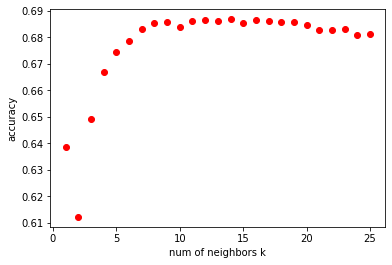

In [26]:
# COMPUTATION TIME: 1 hr 30 min for 25 iterations (3 min 40 sec per iteration)
kwd_acc_jaccard = knn_tester(kwd_train, kwd_test, range(1,26), 'jaccard')

In [27]:
print("maximum accuracy =", kwd_acc_jaccard.max(), "at k =", kwd_acc_jaccard.argmax()+1)

maximum accuracy = 0.6867379006913891 at k = 14


#### Conclusion 1: 

On "key_words_data" dataframe the jaccard metric gives about 5% better accuracy over the euclidean (0.686738 vs 0.639221), while being reasonably fast. For both metrics the values of $k$ level off at about $k=9$, and after that change insignificantly.

### analyzing removed_adj_data dataframe:

In [28]:
rad = pd.read_csv('removed_adj_data.csv')

In [29]:
rad.shape

(39774, 5642)

In [30]:
rad.head()

,id,cuisine,salt,garlic,onions,olive oil,butter,water,black pepper,garlic cloves,...,vegetable-filled ravioli,fiber one,blackpepper,fettuccini,chicharron,hawaiian salt,cheesi doubl cheddar sauc,orange flavored brandy,dasheen,cheese crackers
0,10259,greek,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


#### testing with euclidean metric 

In [31]:
# preparing training and testing samples
rad_train, rad_test = train_test_split(rad, 
                                       random_state=429,
                                       shuffle = True,
                                       test_size = 0.2,
                                       stratify = rad.cuisine)

trying 1 neighbor classifier: test set accuracy = 0.5407919547454432
trying 2 neighbor classifier: test set accuracy = 0.49981143934632305
trying 3 neighbor classifier: test set accuracy = 0.5274670018856066
trying 4 neighbor classifier: test set accuracy = 0.5409176618478944
trying 5 neighbor classifier: test set accuracy = 0.5478315524827153
trying 6 neighbor classifier: test set accuracy = 0.5503456945317411
trying 7 neighbor classifier: test set accuracy = 0.5463230672532998
trying 8 neighbor classifier: test set accuracy = 0.5512256442489001
trying 9 neighbor classifier: test set accuracy = 0.5513513513513514
trying 10 neighbor classifier: test set accuracy = 0.5490886235072282
trying 11 neighbor classifier: test set accuracy = 0.549465744814582
trying 12 neighbor classifier: test set accuracy = 0.5503456945317411
trying 13 neighbor classifier: test set accuracy = 0.5474544311753614
trying 14 neighbor classifier: test set accuracy = 0.5497171590194846
trying 15 neighbor classifier

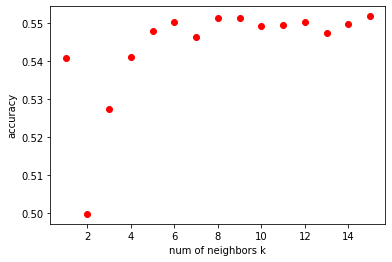

In [32]:
# COMPUTATION TIME: 33 min for 15 iterations (2 min 15 sec/iteration)
rad_acc_euclidean = knn_tester(rad_train, rad_test, range(1,16), 'euclidean')

In [33]:
print("maximum accuracy =", rad_acc_euclidean.max(), "at k =", rad_acc_euclidean.argmax()+1)

maximum accuracy = 0.5517284726587052 at k = 15


#### testing with jaccard metric

In [41]:
# WARNING: LONG COMPUTATION!
# preparing data for jaccard metric
ingreds = rad.columns[2:]
rad[ingreds] = rad[ingreds].replace([0,1],[False,True])

In [42]:
rad.head()

,id,cuisine,salt,garlic,onions,olive oil,butter,water,black pepper,garlic cloves,...,vegetable-filled ravioli,fiber one,blackpepper,fettuccini,chicharron,hawaiian salt,cheesi doubl cheddar sauc,orange flavored brandy,dasheen,cheese crackers
0,10259,greek,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,25693,southern_us,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,20130,filipino,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,22213,indian,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13162,indian,True,False,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# preparing training and testing samples
rad_train, rad_test = train_test_split(rad, 
                                       random_state=429,
                                       shuffle = True,
                                       test_size = 0.2,
                                       stratify = rad.cuisine)

In [ ]:
## WARNING: LONG COMPUTATION!
## COMPUTATION TIME: 10 hours for 15 iterations (40 min/iteration)
#rad_acc_jaccard = knn_tester(rad_train,rad_test,range(1,16),'jaccard')

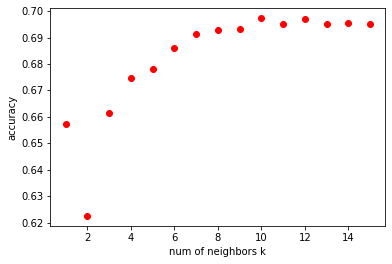

In [ ]:
print("maximum accuracy =", rad_acc_jaccard.max(), "at k = ", rad_acc_jaccard.argmax()+1)

#### Conclusion 2:

On "removed_adj_data" dataframe the jaccard metric gives about 14.5% better accuracy over the euclidean (0.697297 vs 0.551728). Compared to "key_words_data" dataframe, the jaccard metric gives only 1% better accuracy, but the speed is prohibitively slow. For both metrics the values of  𝑘  level off at about  𝑘=9 , and after that change insignificantly. 

It seems reasonable to keep working with "key_words_data" dataframe with jaccard metric, if we would like to add n-fold cross-validation.